Trf is a dominant EMS mutation in Mo17. The WGS data is from pools of mutant and wildtype siblings. WGS from Novogene, fastq processed and trimmed, then Bowtie2 aligned to the B73 NAM5.0 genome, them samtools mpileup to generate the ,vcf file. then python vcf converter to .txt

In [2]:
#Use R to map the variants/ SNPs
N <- read.table("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/TrfN5_WGS_NAM5_mpileup_Dec2022.txt", header = T, sep = "\t", row.names=NULL)

summary(N)


     CHROM              POS                 REF               ALT         
 chr1   :1056600   Min.   :     1032   A      :1798011   [C]    :1755998  
 chr4   : 979942   1st Qu.: 50590688   T      :1797462   [G]    :1754983  
 chr2   : 940993   Median :104139010   G      :1692985   [T]    :1720718  
 chr3   : 780701   Mean   :112569351   C      :1692662   [A]    :1718865  
 chr7   : 694865   3rd Qu.:165005424   AT     :   7520   [AT]   :   6828  
 chr5   : 652846   Max.   :308450483   AG     :   7345   [AG]   :   6601  
 (Other):2467075                       (Other): 577037   (Other): 609029  
      QUAL              AF                DP             X          
 Min.   :  3.01   Min.   :0.01491   Min.   :   1.00   Mode:logical  
 1st Qu.: 28.42   1st Qu.:0.75000   1st Qu.:  12.00   NA's:7573022  
 Median : 83.42   Median :1.00000   Median :  18.00                 
 Mean   :100.84   Mean   :0.85505   Mean   :  19.25                 
 3rd Qu.:170.24   3rd Qu.:1.00000   3rd Qu.:  23.00    

In [3]:
M <- read.table("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/TrfM6_WGS_NAM5_mpileup_Dec2022.txt", header = T, sep = "\t", row.names=NULL)
summary(M)

     CHROM              POS                 REF               ALT         
 chr1   :1056002   Min.   :     1032   A      :1804364   [G]    :1760274  
 chr4   : 982107   1st Qu.: 50232405   T      :1801952   [C]    :1759546  
 chr2   : 946225   Median :103663383   G      :1694564   [T]    :1722937  
 chr3   : 779969   Mean   :112370483   C      :1693824   [A]    :1721478  
 chr7   : 691364   3rd Qu.:165065277   AT     :   7683   [AT]   :   6858  
 chr5   : 651338   Max.   :308450483   AG     :   7448   [TC]   :   6648  
 (Other):2480616                       (Other): 577786   (Other): 609880  
      QUAL              AF                DP             X          
 Min.   :  3.01   Min.   :0.01387   Min.   :   1.00   Mode:logical  
 1st Qu.: 28.42   1st Qu.:0.79167   1st Qu.:  12.00   NA's:7587621  
 Median : 83.52   Median :1.00000   Median :  17.00                 
 Mean   :101.07   Mean   :0.86542   Mean   :  18.76                 
 3rd Qu.:170.42   3rd Qu.:1.00000   3rd Qu.:  23.00    

In [10]:
library(ggplot2)
library (magrittr)
library (zoo)
library (dplyr)

Warning message:
“package ‘zoo’ was built under R version 3.6.2”

Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message:
“package ‘dplyr’ was built under R version 3.6.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 7573022       8

CHROM POS  REF ALT QUAL    AF        DP   X 
1 chr1  1162 A   [T] 17.3081 0.9653130 1182 NA
2 chr1  3052 T   [A] 35.1421 0.9195402  522 NA
3 chr1  3075 T   [G] 30.3489 0.9814815  378 NA
4 chr1  3077 T   [C] 17.2837 0.9558360  317 NA
5 chr1  3593 T   [G] 18.5661 0.4571429  210 NA
6 chr1  3619 T   [C] 64.0540 0.8915663  166 NA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



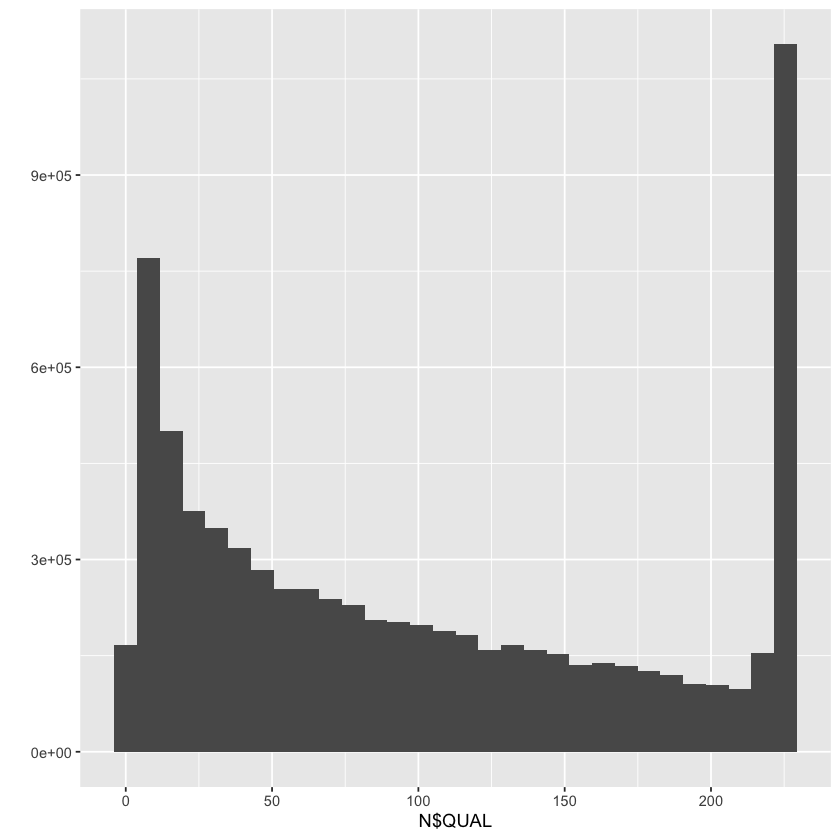

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



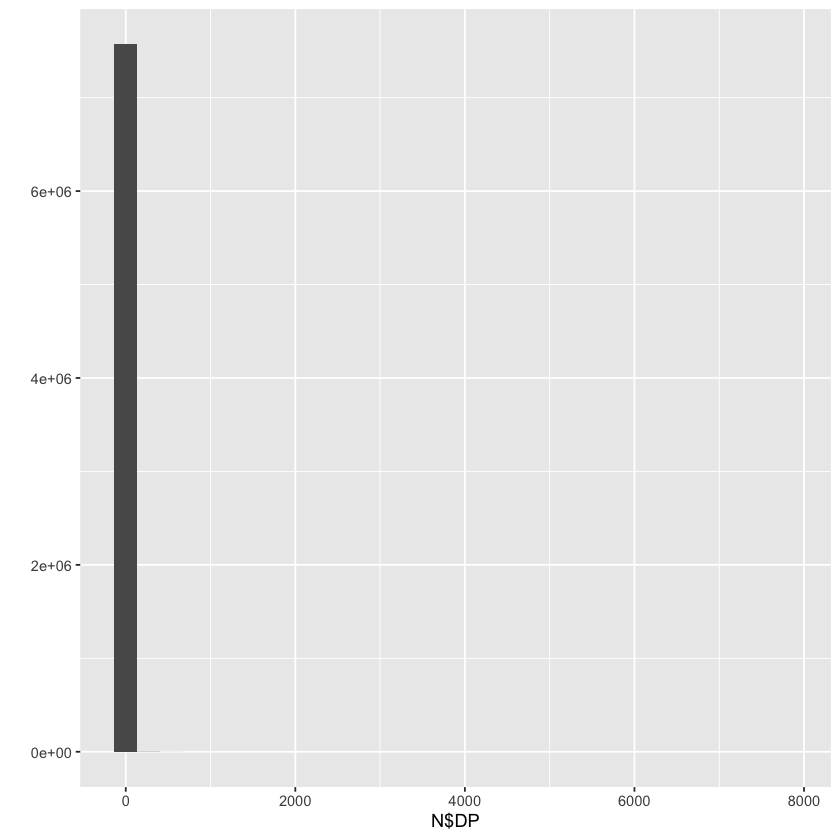

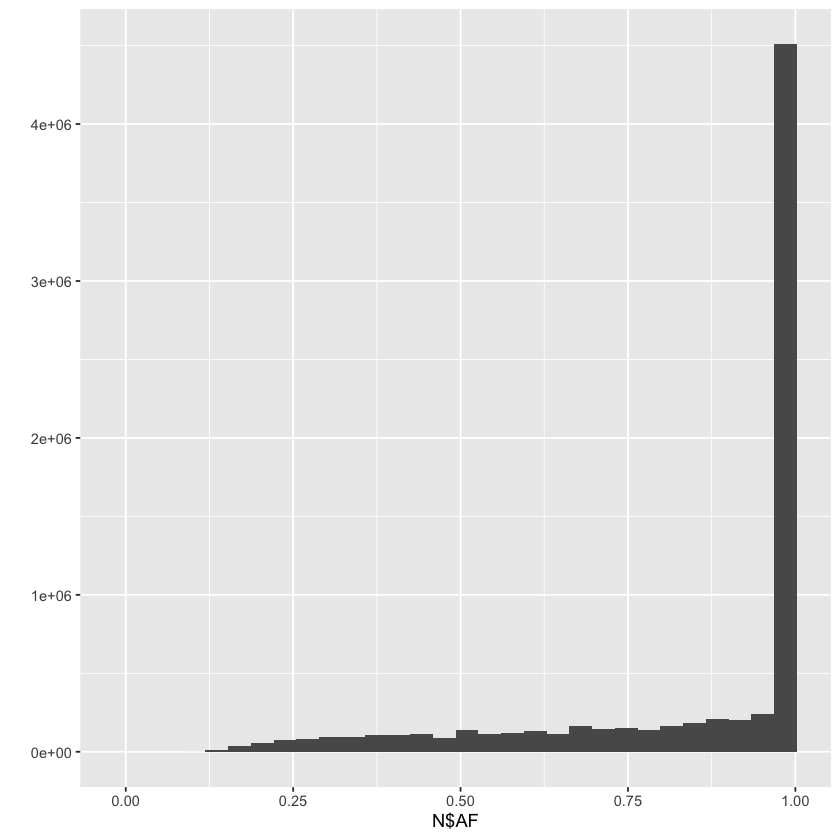

In [11]:
dim(N)
head(N)
qplot(N$QUAL)
qplot(N$DP)
qplot(N$AF)

Warning message:
“Removed 500 rows containing missing values (geom_path).”


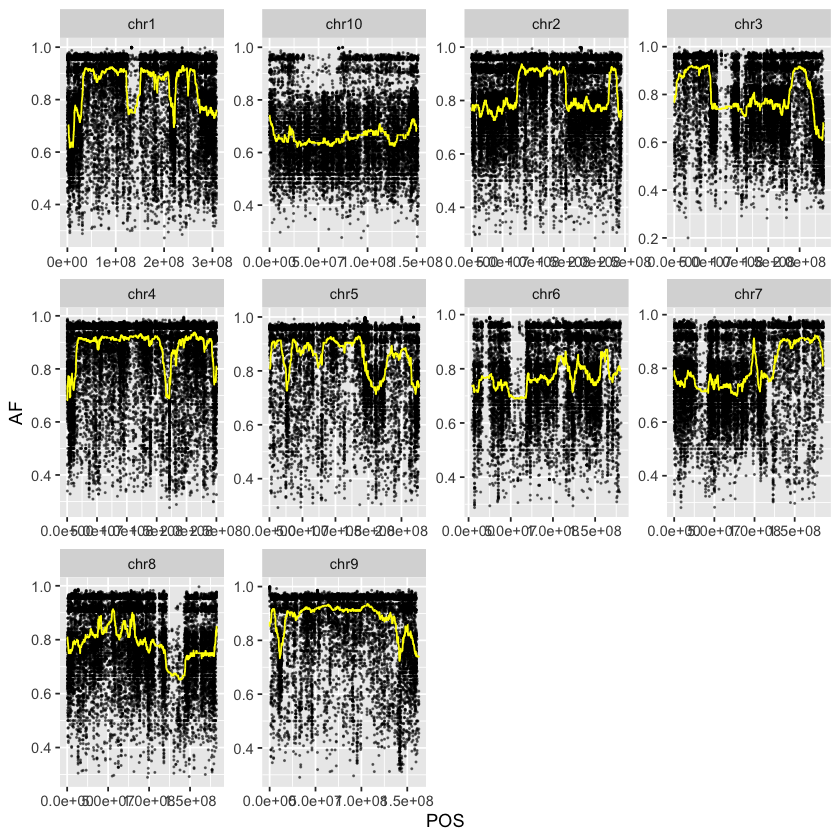

In [12]:
subset(N, QUAL>220 & DP>20 & AF<1.0) %>% ggplot (aes(x=POS, y=AF, group=CHROM)) + 
    geom_point(size=0.2, alpha=0.5) +
    geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +
    facet_wrap(~CHROM, scales="free")

Warning message:
“Removed 500 rows containing missing values (geom_path).”


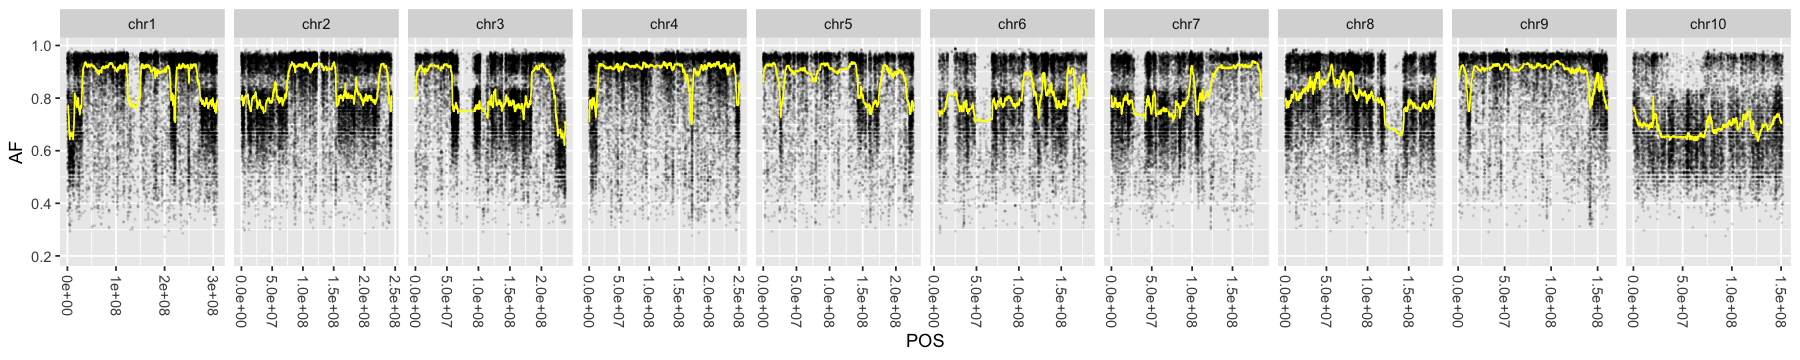

In [13]:
# Let's rearrange the plots 
N_data <- subset(N, QUAL>220 & DP>10 &DP<100 & AF<1.0)  # subset the data based on filters for QUAL, DP, AF values

options(repr.plot.width=15, repr.plot.height=3) # define size of plotting area 


# reorder the CHROM factor to make the plot make more sense 
library(forcats)
N_plot <- N_data %>%
  mutate(CHROM = fct_relevel(CHROM, 
            "chr1", "chr2", "chr3", 
            "chr4", "chr5", "chr6", 
            "chr7", "chr8" , "chr9", "chr10")) %>%
  ggplot(aes(x=POS, y=AF, group=CHROM) )


# Rotate the X axis names so that they are visible 
N_plot + 
    geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
    geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +  # calculate a rolling median and plit this as a yellow line
    facet_grid(~CHROM, scales="free")  + # place all the plots on the same plotting area
    theme(axis.text.x=element_text(angle =- 90, vjust = 0.5)) + # rotate the x- axis labels 
    scale_y_continuous(breaks=c(0.2, 0.4, 0.6, 0.8, 1.0))

# reset plotting area 
options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 

[1] 7587621       8

CHROM POS  REF ALT QUAL    AF        DP  X 
1 chr1  3052 T   [A] 42.1811 0.9394464 578 NA
2 chr1  3075 T   [G] 26.3018 0.9678218 404 NA
3 chr1  3077 T   [C] 16.2914 0.9607843 357 NA
4 chr1  3593 T   [G] 10.3284 0.4863636 220 NA
5 chr1  3619 T   [C] 30.1271 0.8993289 149 NA
6 chr1  3633 G   [C] 14.4603 0.7263514 296 NA

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



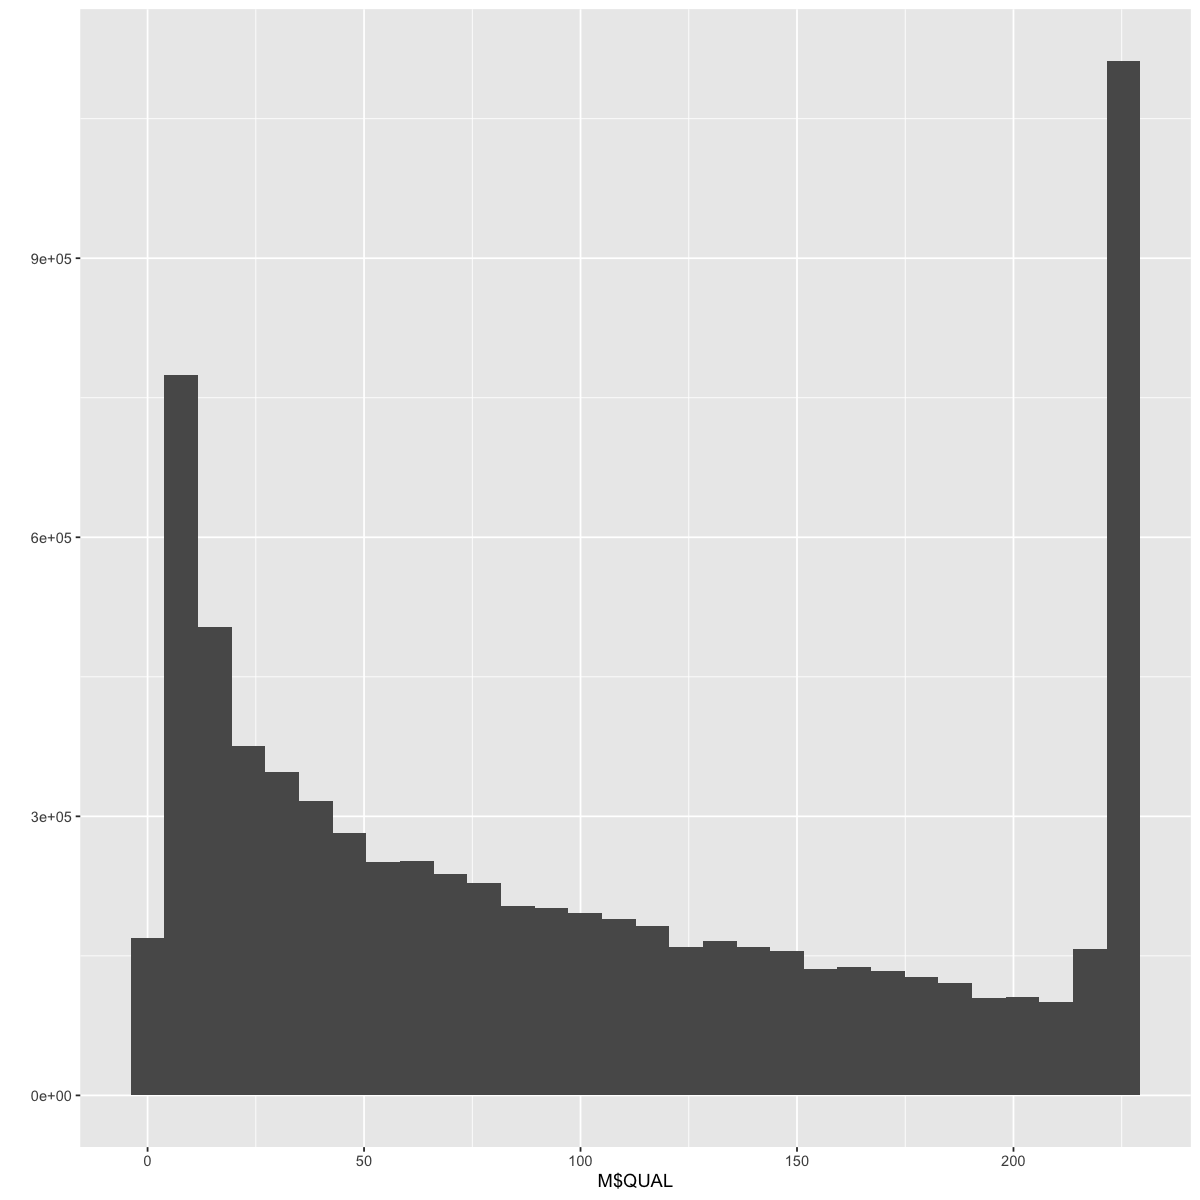

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



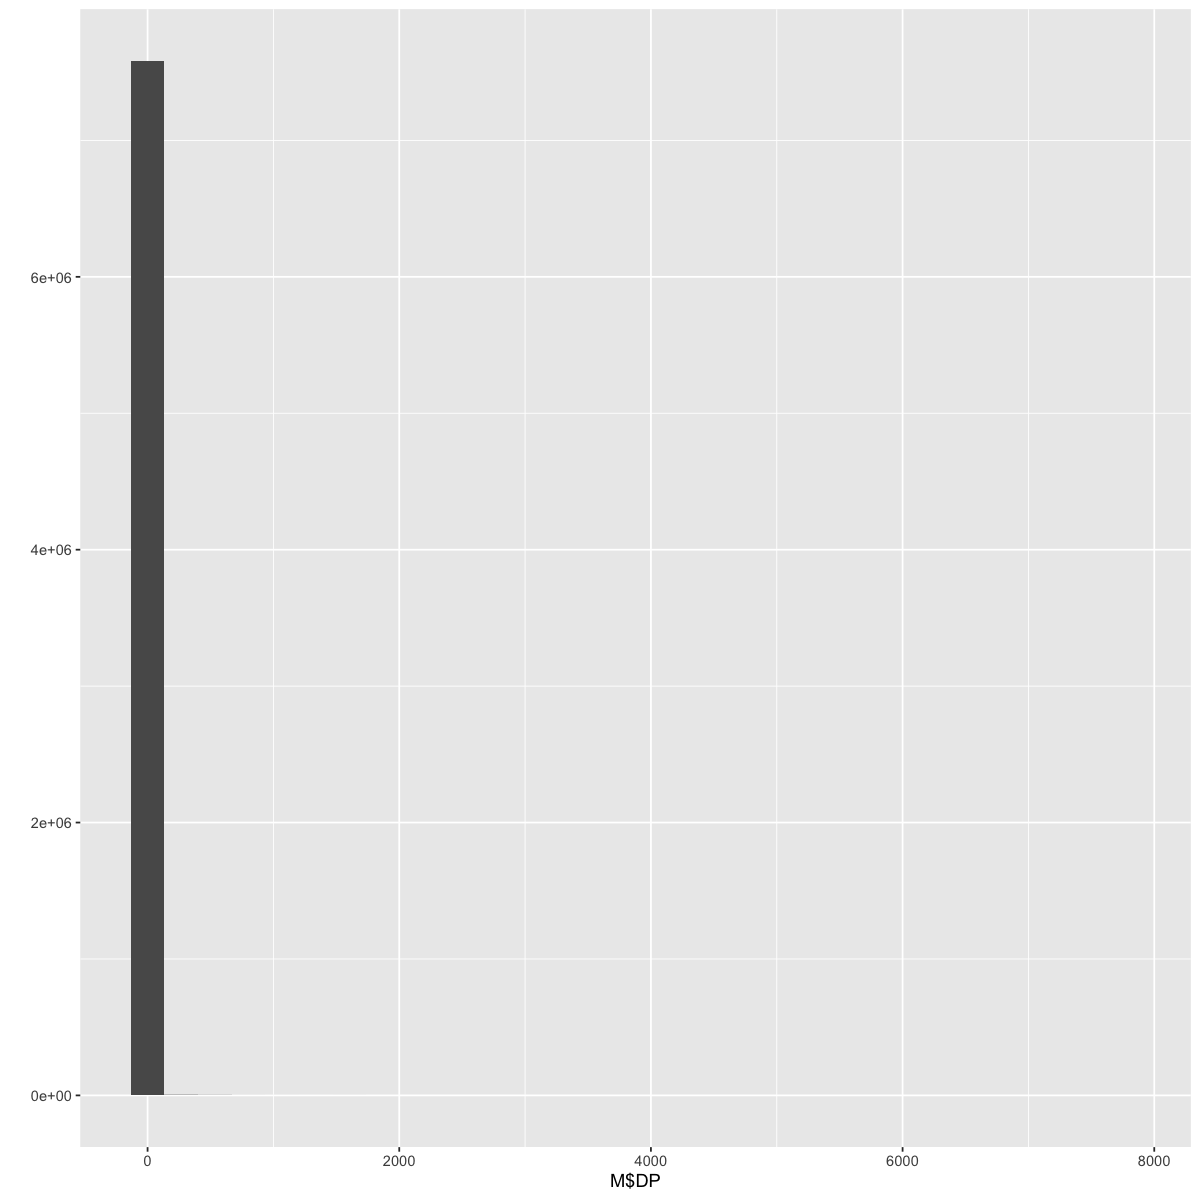

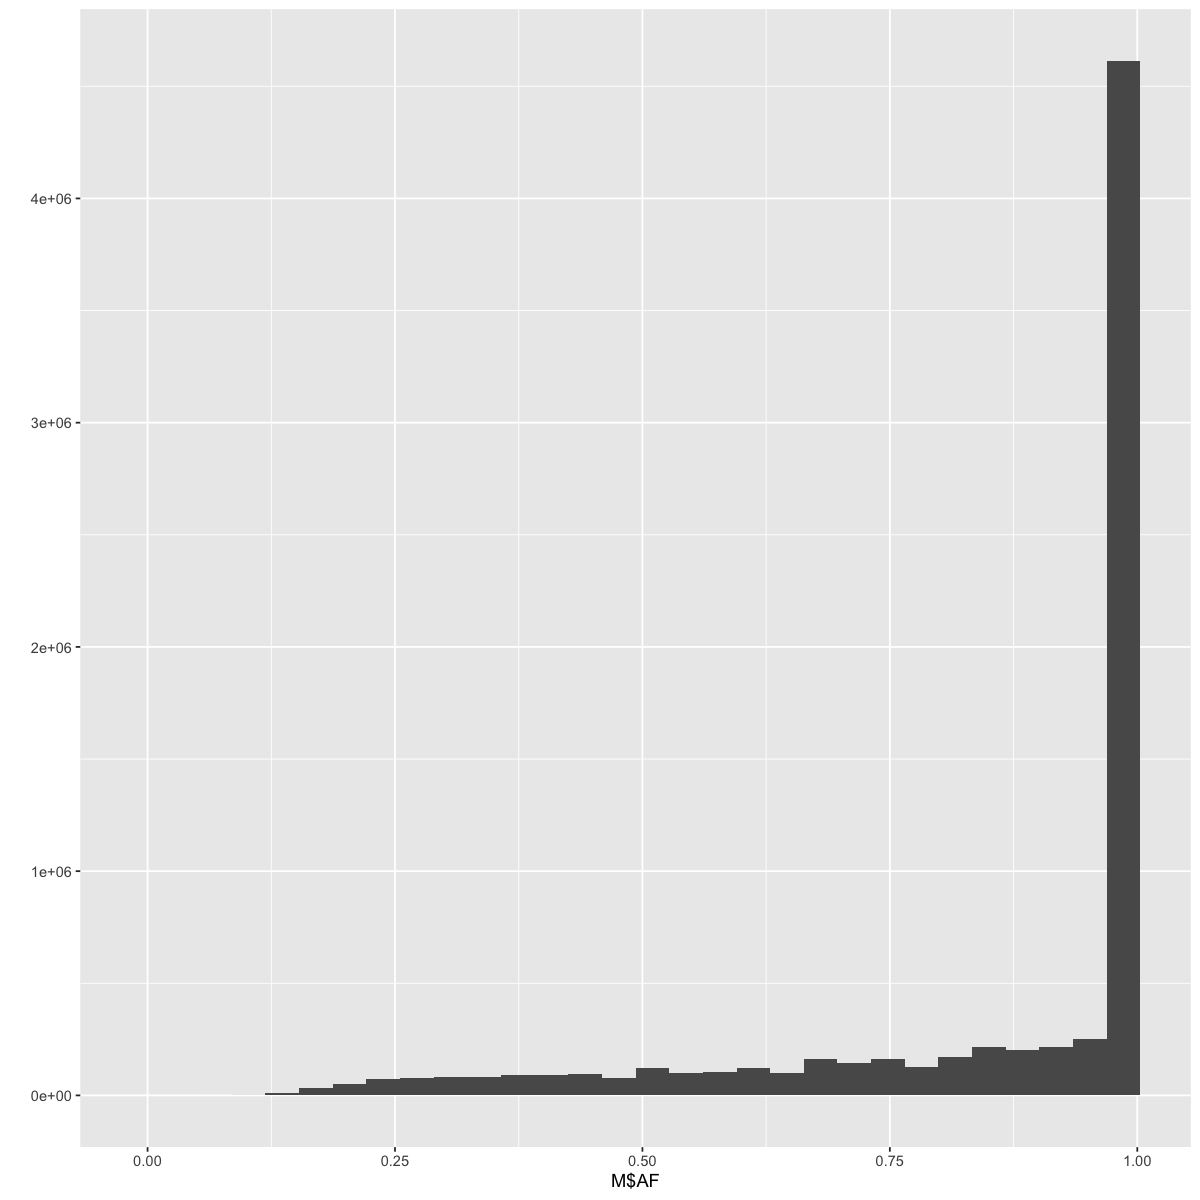

In [14]:
dim(M)
head(M)
qplot(M$QUAL)
qplot(M$DP)
qplot(M$AF)

Warning message:
“Removed 500 rows containing missing values (geom_path).”


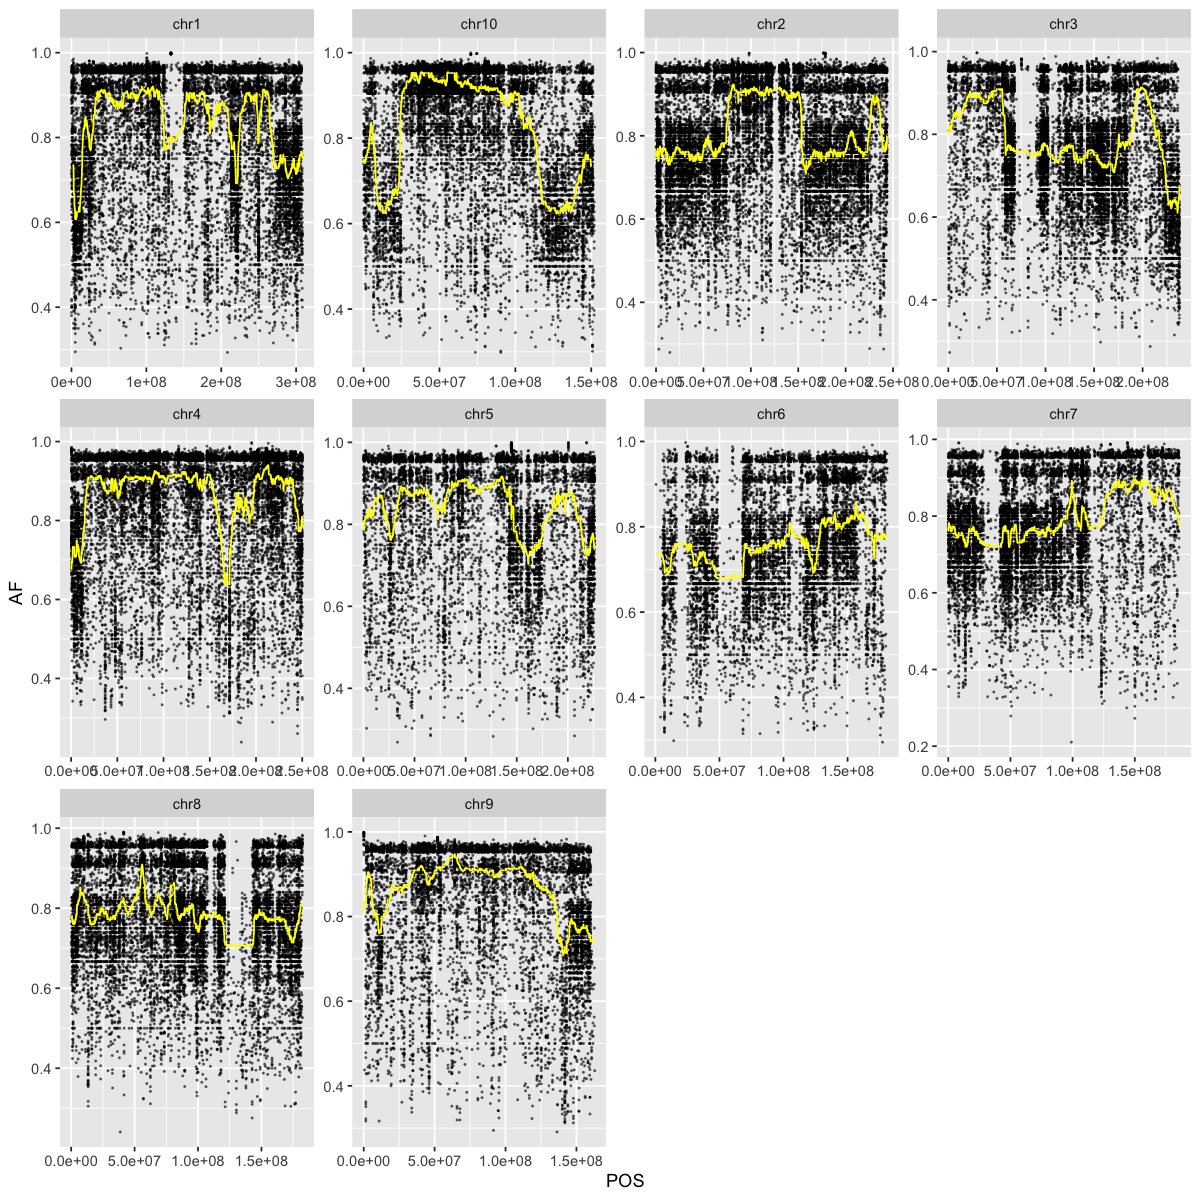

In [15]:
subset(M, QUAL>220 & DP>20 & AF<1.0) %>% ggplot (aes(x=POS, y=AF, group=CHROM)) + 
    geom_point(size=0.2, alpha=0.5) +
    geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +
    facet_wrap(~CHROM, scales="free")

Warning message:
“Removed 500 rows containing missing values (geom_path).”


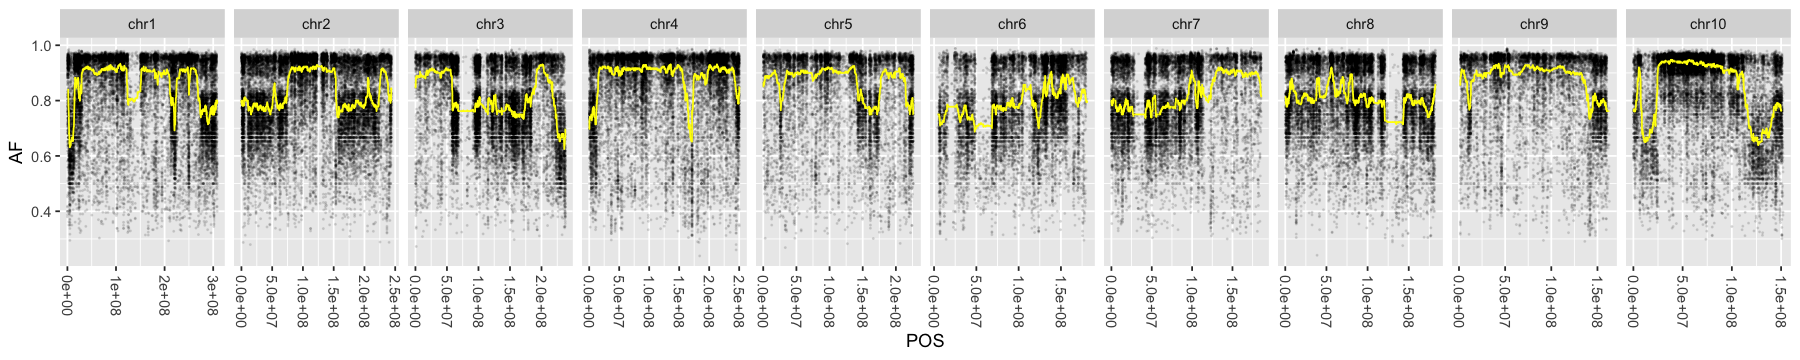

In [16]:
# Let's rearrange the plots 
M_data <- subset(M, QUAL>220 & DP>10 &DP<100 & AF<1.0)  # subset the data based on filters for QUAL, DP, AF values

options(repr.plot.width=15, repr.plot.height=3) # define size of plotting area 


# reorder the CHROM factor to make the plot make more sense 
library(forcats)
M_plot <- M_data %>%
  mutate(CHROM = fct_relevel(CHROM, 
            "chr1", "chr2", "chr3", 
            "chr4", "chr5", "chr6", 
            "chr7", "chr8" , "chr9", "chr10")) %>%
  ggplot(aes(x=POS, y=AF, group=CHROM) )


#WT_plot + 
 #   geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
 #   geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +  # calculate a rolling median and plit this as a yellow line
  #  facet_grid(~CHROM, scales="free")  # place all the plots on the same plotting area

#p + 
 #   geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
  #  geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +  # calculate a rolling median and plit this as a yellow line
   # facet_grid(~CHROM, scales="free")  # place all the plots on the same plotting area

# Rotate the X axis names so that they are visible 
M_plot + 
    geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
    geom_line(aes(y=rollmedian(AF,501,na.pad=T)), color="yellow") +  # calculate a rolling median and plit this as a yellow line
    facet_grid(~CHROM, scales="free")  + # place all the plots on the same plotting area
    theme(axis.text.x=element_text(angle =- 90, vjust = 0.5)) + # rotate the x- axis labels 
    scale_y_continuous(breaks=c(0.2, 0.4, 0.6, 0.8, 1.0))

# reset plotting area 
options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 

In [17]:
# Next let's try calculating allelic distances rather than allele frequency
# First we need to filter the variant lists to only those shared by both the N and MUT pools
shared <- N %>% inner_join(M, by=c("CHROM","POS","REF", "ALT"))
dim(shared)
head(shared)
dim(N)
dim(M)

[1] 6331616      12

CHROM POS  REF ALT QUAL.x  AF.x      DP.x X.x QUAL.y  AF.y      DP.y X.y
1 chr1  3052 T   [A] 35.1421 0.9195402 522  NA  42.1811 0.9394464 578  NA 
2 chr1  3075 T   [G] 30.3489 0.9814815 378  NA  26.3018 0.9678218 404  NA 
3 chr1  3077 T   [C] 17.2837 0.9558360 317  NA  16.2914 0.9607843 357  NA 
4 chr1  3593 T   [G] 18.5661 0.4571429 210  NA  10.3284 0.4863636 220  NA 
5 chr1  3619 T   [C] 64.0540 0.8915663 166  NA  30.1271 0.8993289 149  NA 
6 chr1  3633 G   [C] 28.1243 0.6748252 286  NA  14.4603 0.7263514 296  NA

[1] 7573022       8

[1] 7587621       8

In [18]:
# We now have a table that combined both the N and the MUT and only has shared variant positions
# We can modify this table to make a shared N and a shared MUT table for analysis 
N_shared<- subset(shared, select=c("CHROM", "POS", "REF", "ALT", "QUAL.x","AF.x", "DP.x"))
dim(N_shared)
head(N_shared)
M_shared<-subset(shared, select=c("CHROM", "POS", "REF", "ALT", "QUAL.y","AF.y", "DP.y"))
dim(M_shared)
head(M_shared)

[1] 6331616       7

CHROM POS  REF ALT QUAL.x  AF.x      DP.x
1 chr1  3052 T   [A] 35.1421 0.9195402 522 
2 chr1  3075 T   [G] 30.3489 0.9814815 378 
3 chr1  3077 T   [C] 17.2837 0.9558360 317 
4 chr1  3593 T   [G] 18.5661 0.4571429 210 
5 chr1  3619 T   [C] 64.0540 0.8915663 166 
6 chr1  3633 G   [C] 28.1243 0.6748252 286

[1] 6331616       7

CHROM POS  REF ALT QUAL.y  AF.y      DP.y
1 chr1  3052 T   [A] 42.1811 0.9394464 578 
2 chr1  3075 T   [G] 26.3018 0.9678218 404 
3 chr1  3077 T   [C] 16.2914 0.9607843 357 
4 chr1  3593 T   [G] 10.3284 0.4863636 220 
5 chr1  3619 T   [C] 30.1271 0.8993289 149 
6 chr1  3633 G   [C] 14.4603 0.7263514 296

In [19]:
# Then rename the column titles, to remove the .x or .y
names(N_shared) <- gsub(".x", "", names(N_shared))
head(N_shared)
names(M_shared) <- gsub(".y", "", names(M_shared))
head(M_shared)

CHROM POS  REF ALT QUAL    AF        DP 
1 chr1  3052 T   [A] 35.1421 0.9195402 522
2 chr1  3075 T   [G] 30.3489 0.9814815 378
3 chr1  3077 T   [C] 17.2837 0.9558360 317
4 chr1  3593 T   [G] 18.5661 0.4571429 210
5 chr1  3619 T   [C] 64.0540 0.8915663 166
6 chr1  3633 G   [C] 28.1243 0.6748252 286

CHROM POS  REF ALT QUAL    AF        DP 
1 chr1  3052 T   [A] 42.1811 0.9394464 578
2 chr1  3075 T   [G] 26.3018 0.9678218 404
3 chr1  3077 T   [C] 16.2914 0.9607843 357
4 chr1  3593 T   [G] 10.3284 0.4863636 220
5 chr1  3619 T   [C] 30.1271 0.8993289 149
6 chr1  3633 G   [C] 14.4603 0.7263514 296

In [20]:
# Calculate allelic distance 
#calculate MUT allelic distance
M_AD <- M_shared
M_AD["AD"] <- as.numeric(M_shared$AF)-as.numeric(N_shared$AF)  # positive AD is like recessive mut
M_AD["absAD"] <- abs(as.numeric(M_shared$AF)-as.numeric(N_shared$AF))  # expression of difference, unknown which parent
dim(M_AD)
head(M_AD)

[1] 6331616       9

CHROM POS  REF ALT QUAL    AF        DP  AD           absAD      
1 chr1  3052 T   [A] 42.1811 0.9394464 578  0.019906137 0.019906137
2 chr1  3075 T   [G] 26.3018 0.9678218 404 -0.013659699 0.013659699
3 chr1  3077 T   [C] 16.2914 0.9607843 357  0.004948352 0.004948352
4 chr1  3593 T   [G] 10.3284 0.4863636 220  0.029220779 0.029220779
5 chr1  3619 T   [C] 30.1271 0.8993289 149  0.007762594 0.007762594
6 chr1  3633 G   [C] 14.4603 0.7263514 296  0.051526177 0.051526177

[1] "Plot of absolute alellic distance between N and MUT groups when mapped to the NAM5 genome"

Warning message:
“Removed 100 rows containing missing values (geom_path).”


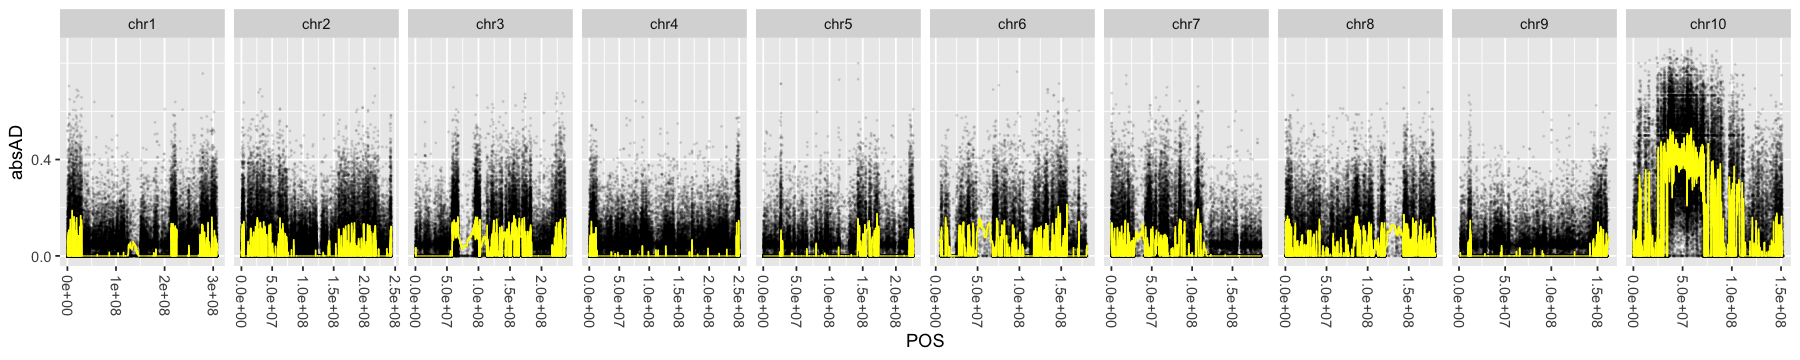

In [22]:
M_data <- subset(M_AD, QUAL>200 & DP>15 & DP<100 )  # subset the data based on filters for QUAL, DP, AF values

options(repr.plot.width=15, repr.plot.height=3) # define size of plotting area 

# reorder the CHROM factor to make the plot make more sense 
M_plot <- M_data %>%
  mutate(CHROM = fct_relevel(CHROM, 
            "chr1", "chr2", "chr3", 
            "chr4", "chr5", "chr6", 
            "chr7", "chr8" , "chr9", "chr10")) %>%
  ggplot(aes(x=POS, y=absAD, group=CHROM))

# Rotate the X axis names so that they are visible 
"Plot of absolute alellic distance between N and MUT groups when mapped to the NAM5 genome"
M_plot + 
    geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
    geom_line(aes(y=rollmedian(absAD,101,na.pad=T)), color="yellow")  + # calculate a rolling median and plit this as a yellow line
    facet_grid(~CHROM, scales="free")  + # place all the plots on the same plotting area
    theme(axis.text.x=element_text(angle =- 90, vjust = 0.5)) + # rotate the x- axis labels 
    scale_y_continuous(breaks=c(-0.4, 0.0, 0.4))

# reset plotting area 
options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 

[1] "Plot of alellic distance between N and MUT groups when mapped to the NAM5 genome"

Warning message:
“Removed 100 rows containing missing values (geom_path).”


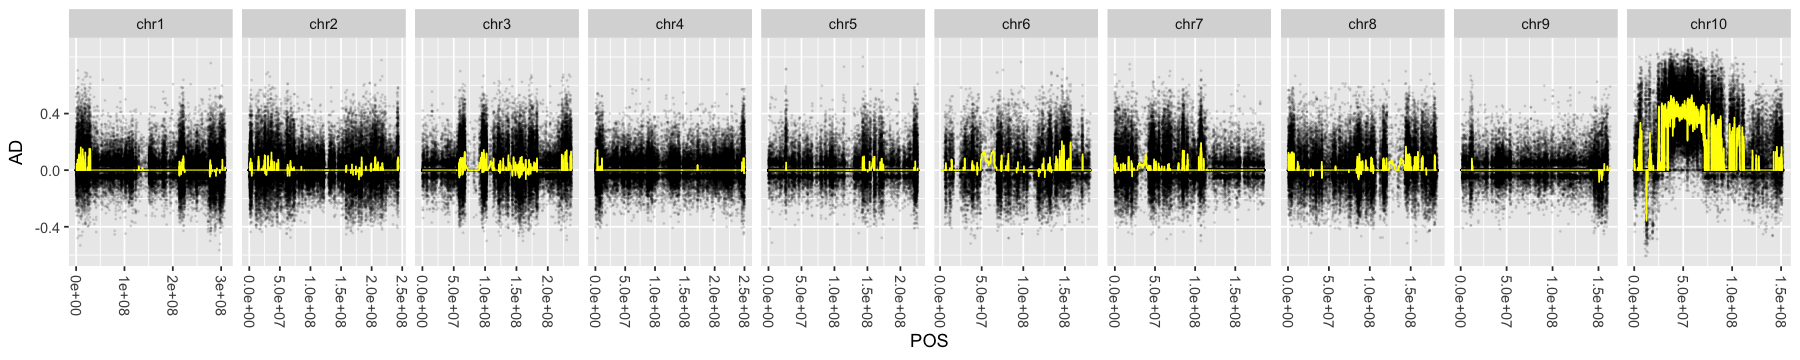

In [23]:
M_data <- subset(M_AD, QUAL>200 & DP>15 & DP<100 )  # subset the data based on filters for QUAL, DP, AF values

options(repr.plot.width=15, repr.plot.height=3) # define size of plotting area 

# reorder the CHROM factor to make the plot make more sense 
M_plot <- M_data %>%
  mutate(CHROM = fct_relevel(CHROM, 
            "chr1", "chr2", "chr3", 
            "chr4", "chr5", "chr6", 
            "chr7", "chr8" , "chr9", "chr10")) %>%
  ggplot(aes(x=POS, y=AD, group=CHROM))

# Rotate the X axis names so that they are visible 
"Plot of alellic distance between N and MUT groups when mapped to the NAM5 genome"
M_plot + 
    geom_point(size=0.2, alpha=0.1) +   # define the size of the points and their opacity 
    geom_line(aes(y=rollmedian(AD,101,na.pad=T)), color="yellow")  + # calculate a rolling median and plit this as a yellow line
    facet_grid(~CHROM, scales="free")  + # place all the plots on the same plotting area
    theme(axis.text.x=element_text(angle =- 90, vjust = 0.5)) + # rotate the x- axis labels 
    scale_y_continuous(breaks=c(-0.4, 0.0, 0.4))

# reset plotting area 
options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 

In [24]:
# Try mapping allelic distance with Bin windows

step = 500000 #0.5 MBp window

library(dplyr)
newRES_AD <- subset(M_AD, QUAL>=200 & DP>15 & DP<100) %>% 
  mutate(window = .$POS %/% step, CHROM=CHROM) %>% 
  group_by(window, CHROM) %>% 
  summarise(AD_mean = mean(AD), AD_SD = sd(AD), AD_SE = sd(AD)/sqrt(n()), N_marker = n()) %>%
  mutate(start = window*step, stop=(window+1)*step, CHROM) %>%
  select(-window)

head(newRES_AD)
dim(newRES_AD)
summary(newRES_AD)


`summarise()` has grouped output by 'window'. You can override using the `.groups` argument.

Adding missing grouping variables: `window`



window CHROM AD_mean      AD_SD      AD_SE       N_marker start stop 
1 0      chr1   0.025055506 0.12034218 0.008684949 192      0     5e+05
2 0      chr10  0.018918397 0.09070366 0.005326302 290      0     5e+05
3 0      chr2   0.008330652 0.06221947 0.003142558 392      0     5e+05
4 0      chr3   0.010184805 0.05780062 0.004569540 160      0     5e+05
5 0      chr4  -0.003245333 0.06860007 0.003615541 360      0     5e+05
6 0      chr5   0.001767063 0.04089870 0.002571279 253      0     5e+05

[1] 4222    8

     window          CHROM         AD_mean              AD_SD        
 Min.   :  0.0   chr1   : 614   Min.   :-0.137396   Min.   :0.00000  
 1st Qu.:107.0   chr4   : 500   1st Qu.: 0.001932   1st Qu.:0.03769  
 Median :213.0   chr2   : 486   Median : 0.006357   Median :0.06073  
 Mean   :223.2   chr3   : 464   Mean   : 0.026230   Mean   :0.07533  
 3rd Qu.:321.8   chr5   : 453   3rd Qu.: 0.022446   3rd Qu.:0.10760  
 Max.   :616.0   chr7   : 369   Max.   : 0.461085   Max.   :0.31430  
                 (Other):1336                       NA's   :29       
     AD_SE             N_marker          start                stop          
 Min.   :0.000000   Min.   :   1.0   Min.   :        0   Min.   :   500000  
 1st Qu.:0.002012   1st Qu.: 110.0   1st Qu.: 53500000   1st Qu.: 54000000  
 Median :0.004600   Median : 240.0   Median :106500000   Median :107000000  
 Mean   :0.008393   Mean   : 275.9   Mean   :111579938   Mean   :112079938  
 3rd Qu.:0.009241   3rd Qu.: 396.0   3rd Qu.:160875000 

Warning message:
“Removed 29 rows containing missing values (geom_errorbar).”


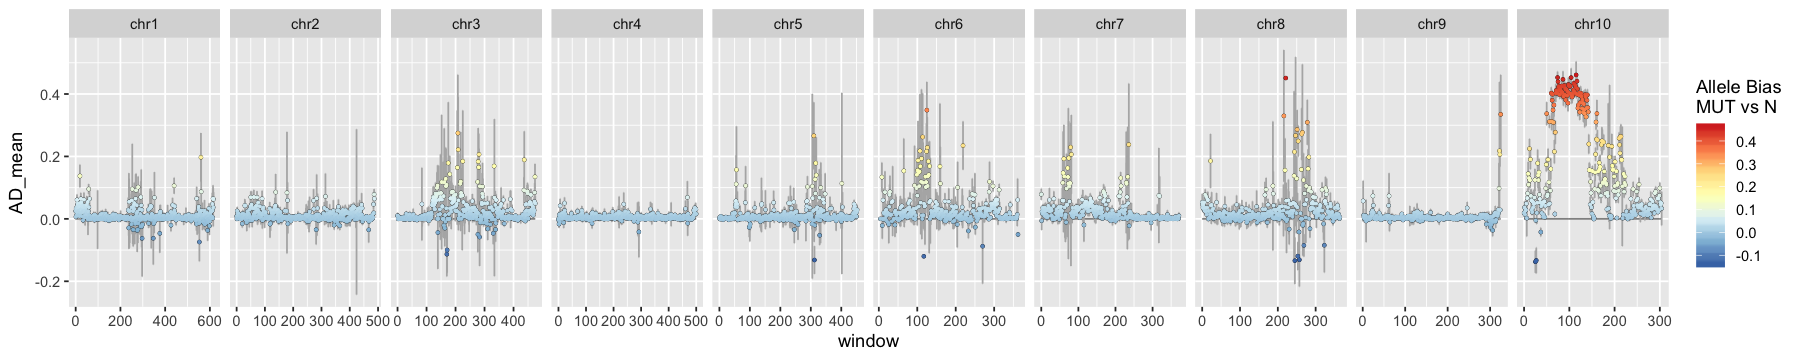

In [25]:
data <- newRES_AD
#options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 
options(repr.plot.width=15, repr.plot.height=3) # define size of plotting area 
# reorder the CHROM factor to make the plot make more sense 
plot <- data %>%
  mutate(CHROM = fct_relevel(CHROM, 
            "chr1", "chr2", "chr3", 
            "chr4", "chr5", "chr6", 
            "chr7", "chr8" , "chr9", "chr10")) %>%
  ggplot(aes(x=window, y=AD_mean, group=CHROM))

# Rotate the X axis names so that they are visible 
plot + 
    geom_line(aes(y=0), color="black", alpha=0.5) +
   geom_errorbar (aes(ymax=AD_mean+1.96*AD_SE, ymin=AD_mean-1.96*AD_SE), color="grey70") +
    geom_point (color="black", size = 0.6) +
    geom_point (aes(color=AD_mean), size = 0.5) +
    scale_colour_distiller("Allele Bias\nMUT vs N", palette="RdYlBu") +
    facet_grid(~CHROM, scales="free_x")


Warning message:
“Removed 500 rows containing missing values (geom_path).”


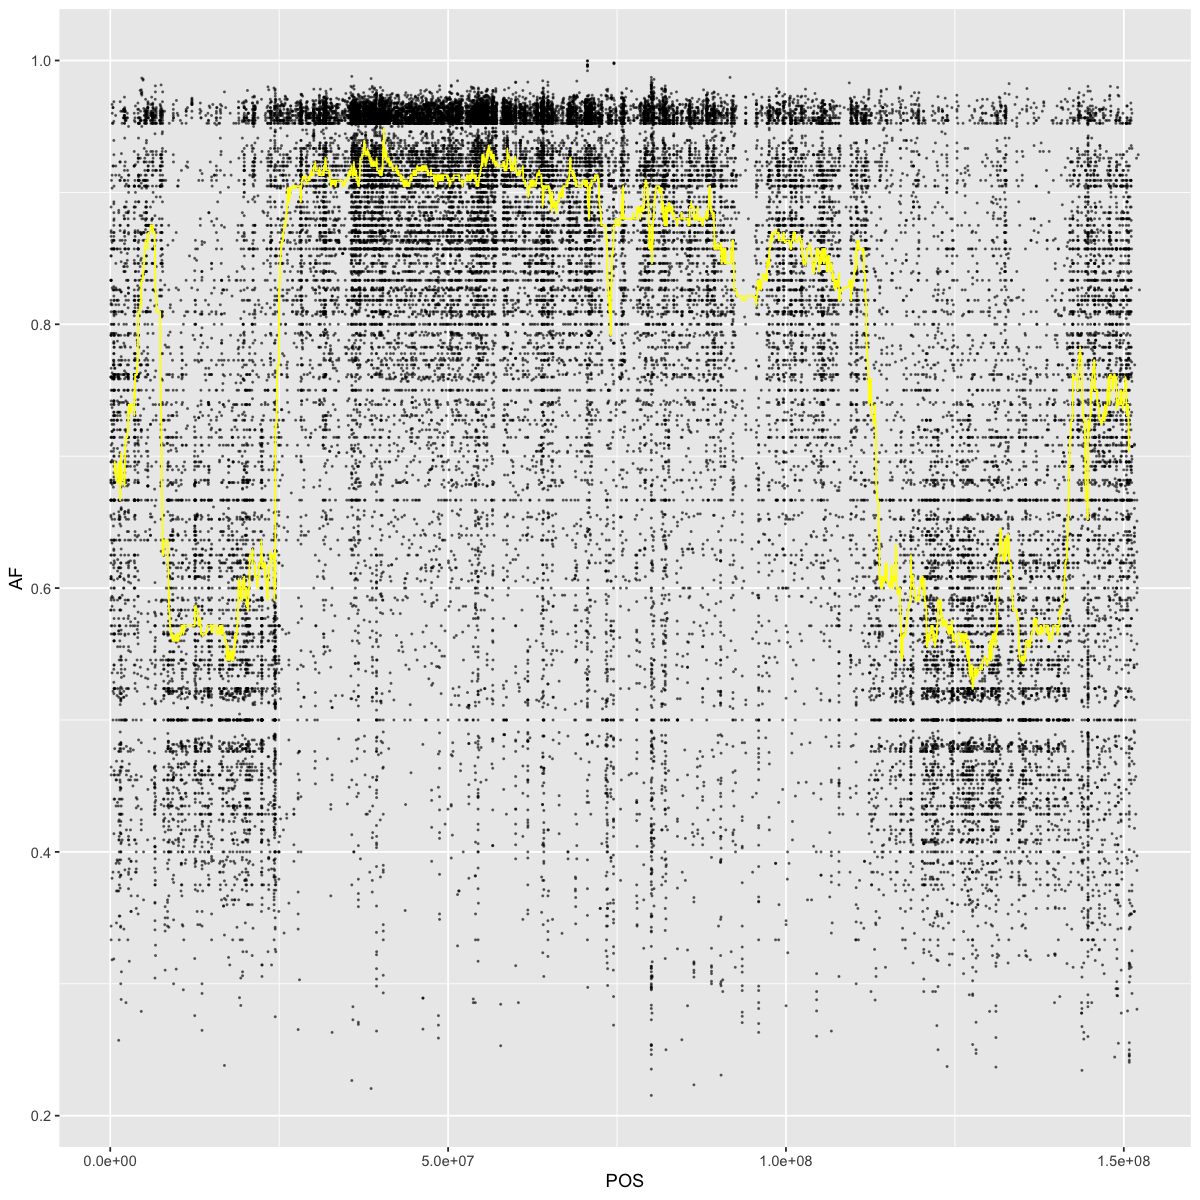

In [27]:
# This suggests that Trf is on chromsome 10. Let's look at it more closely. 
options(repr.plot.width=10, repr.plot.height=10) # define size of plotting area 
subset(M, QUAL>150 & DP>20 & AF<1.0 & CHROM=="chr10") %>% ggplot (aes(x=POS, y=AF)) + 
    geom_point(size=0.2, alpha=0.5) +
    geom_line(aes(y=rollmedian(AF,501,fill=NA)), color="yellow")


In [110]:
# Look  at the SNPEff output 
# Load all the variants identified by snpeff in the interval on chr10 between AD2 to AD3
M_int <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfM6_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3.ann.txt", header = T, sep = "\t", row.names=NULL)
dim(M_int)
summary (M_int)


[1] 1530    8

   CHROM           POS                REF             ALT     
 chr10:1530   Min.   :13496880   A      :388   [G]      :364  
              1st Qu.:13584429   T      :344   [C]      :361  
              Median :13714120   C      :324   [T]      :318  
              Mean   :13740087   G      :310   [A]      :315  
              3rd Qu.:13917354   ATTTTT :  4   [ATTTTTT]:  5  
              Max.   :14026661   CTA    :  4   [ATT]    :  3  
                                 (Other):156   (Other)  :164  
      QUAL               AF               DP           X          
 Min.   :  3.033   Min.   :0.1500   Min.   : 1.00   Mode:logical  
 1st Qu.: 20.004   1st Qu.:0.4815   1st Qu.:12.00   NA's:1530     
 Median : 54.415   Median :0.7500   Median :17.00                 
 Mean   : 79.796   Mean   :0.7284   Mean   :18.74                 
 3rd Qu.:127.350   3rd Qu.:1.0000   3rd Qu.:23.00                 
 Max.   :228.389   Max.   :1.0000   Max.   :74.00                 
                           

In [111]:
N_int <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfN5_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3.ann.txt", header = T, sep = "\t", row.names=NULL)
dim(N_int)
summary (N_int)

[1] 1856    8

   CHROM           POS                   REF           ALT     
 chr10:1856   Min.   :13496880   T         :467   [C]    :444  
              1st Qu.:13584948   A         :456   [G]    :443  
              Median :13707876   C         :396   [T]    :399  
              Mean   :13735123   G         :359   [A]    :374  
              3rd Qu.:13917827   ATTTTTTTTT:  4   [AT]   :  4  
              Max.   :14026602   GAAAAAAA  :  4   [AC]   :  3  
                                 (Other)   :170   (Other):189  
      QUAL               AF               DP           X          
 Min.   :  3.162   Min.   :0.1429   Min.   : 1.00   Mode:logical  
 1st Qu.: 18.476   1st Qu.:0.8919   1st Qu.:11.00   NA's:1856     
 Median : 67.415   Median :1.0000   Median :17.00                 
 Mean   : 91.204   Mean   :0.8937   Mean   :18.24                 
 3rd Qu.:152.309   3rd Qu.:1.0000   3rd Qu.:23.00                 
 Max.   :228.408   Max.   :1.0000   Max.   :98.00                 
                   

In [112]:
M_HorM_int <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfM6_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3_HIGHorMOD.ann.txt", header = T, sep = "\t", row.names=NULL)
dim(M_HorM_int)
summary (M_HorM_int)

[1] 37  8

   CHROM         POS                REF             ALT          QUAL       
 chr10:37   Min.   :13498464   C      :12   [T]       :10   Min.   :  9.08  
            1st Qu.:13503212   G      : 7   [C]       : 9   1st Qu.: 61.08  
            Median :13678108   A      : 6   [G]       : 6   Median :131.28  
            Mean   :13701868   T      : 3   [A]       : 4   Mean   :129.95  
            3rd Qu.:13953240   AG     : 1   [AGAGGAGG]: 1   3rd Qu.:194.61  
            Max.   :13954139   CG     : 1   [CGAAG]   : 1   Max.   :225.42  
                               (Other): 7   (Other)   : 6                   
       AF               DP          X          
 Min.   :0.2222   Min.   : 4.0   Mode:logical  
 1st Qu.:0.5000   1st Qu.:13.0   NA's:37       
 Median :0.7222   Median :16.0                 
 Mean   :0.7178   Mean   :15.7                 
 3rd Qu.:1.0000   3rd Qu.:20.0                 
 Max.   :1.0000   Max.   :26.0                 
                                               

In [113]:
M_HorM_int

CHROM POS      REF                       ALT                      QUAL     
1  chr10 13498464 A                         [T]                      225.41700
2  chr10 13498471 A                         [C]                      225.41700
3  chr10 13501412 C                         [T]                       74.95970
4  chr10 13501546 GAGCTGCAGCTGCAGCTGCAGCTGC [GAGCTGCAGCTGC]          106.32100
5  chr10 13501725 G                         [T]                      104.29500
6  chr10 13501946 C                         [T]                      221.97300
7  chr10 13502011 C                         [G]                      131.27700
8  chr10 13503120 C                         [G]                       39.56940
9  chr10 13503206 GGCAGCAGCAG               [GGCAGCAG]                15.70380
10 chr10 13503212 AG                        [AGAGGAGG]                47.47950
11 chr10 13503214 C                         [A]                      162.41600
12 chr10 13503307 G                         [C]                       84.05460
13 chr10 13553850 G                         [C]                       98.37570
14 chr10 13577193 TACAACAA                  [TACAACAACAA]             14.55060
15 chr10 13591599 T                         [G]                      156.40500
16 chr10 13675707 TGAGG                     [TGAGGAGG]               220.64100
17 chr10 13676774 G                         [A]                       33.08540
18 chr10 13678064 C                         [T]                      220.27000
19 chr10 13678108 C                         [G]                      182.26900
20 chr10 13678153 T                         [C]                      225.41700
21 chr10 13678409 A                         [C]                      225.41700
22 chr10 13679068 G                         [A]                      194.60700
23 chr10 13679378 G                         [T]                      225.41700
24 chr10 13679404 C                         [G]                       74.22730
25 chr10 13679503 C                         [T]                      215.41700
26 chr10 13953076 GCGCAACCGCAACCGC          [GCGCAACCGCAACCGCAACCGC]  55.41460
27 chr10 13953119 CGGCCAG                   [C]                      131.41600
28 chr10 13953240 C                         [A]                        9.07957
29 chr10 13953240 CG                        [CGAAG]                  101.48900
30 chr10 13953295 C                         [G]                       61.07540
31 chr10 13953296 A                         [C]                       61.07540
32 chr10 13953358 TCGGCGCCGGCGCCGGCGCCGGCGC [TCGGCGCCGGCGCCGGCGC]     22.42530
33 chr10 13953392 C                         [T]                      122.41500
34 chr10 13954031 T                         [C]                      184.41600
35 chr10 13954032 A                         [T]                      182.41600
36 chr10 13954038 G                         [T]                      182.41600
37 chr10 13954139 A                         [C]                      169.41600
   AF        DP X 
1  1.0000000 14 NA
2  1.0000000 16 NA
3  0.5000000 24 NA
4  0.5714286 21 NA
5  0.6428571 14 NA
6  0.6666667 21 NA
7  0.4117647 17 NA
8  0.3076923 13 NA
9  0.2222222  9 NA
10 0.2727273 11 NA
11 1.0000000  7 NA
12 0.3571429 14 NA
13 0.4545455 11 NA
14 0.7000000 20 NA
15 0.6000000 25 NA
16 0.8000000 20 NA
17 0.2307692 13 NA
18 0.5909091 22 NA
19 0.5882353 17 NA
20 1.0000000 17 NA
21 1.0000000 26 NA
22 0.6666667 18 NA
23 1.0000000 13 NA
24 0.4000000 10 NA
25 1.0000000 11 NA
26 1.0000000  4 NA
27 1.0000000  9 NA
28 0.2857143 14 NA
29 0.8750000 16 NA
30 0.8461538 13 NA
31 0.8461538 13 NA
32 0.7222222 18 NA
33 1.0000000 20 NA
34 1.0000000 15 NA
35 1.0000000 16 NA
36 1.0000000 16 NA
37 1.0000000 23 NA

In [114]:
N_HorM_int <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfN5_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3_HIGHorMOD.ann.txt", header = T, sep = "\t", row.names=NULL)
dim(N_HorM_int)
summary (N_HorM_int)

[1] 36  8

   CHROM         POS                REF          ALT          QUAL        
 chr10:36   Min.   :13498464   A      :8   [C]     :10   Min.   :  7.106  
            1st Qu.:13556692   G      :8   [T]     : 7   1st Qu.: 36.950  
            Median :13676930   C      :7   [G]     : 6   Median :135.416  
            Mean   :13713943   T      :3   [A]     : 3   Mean   :130.782  
            3rd Qu.:13953254   AG     :2   [AAAC]  : 1   3rd Qu.:225.417  
            Max.   :13954139   AA     :1   [AACCAC]: 1   Max.   :228.407  
                               (Other):7   (Other) : 8                    
       AF               DP           X          
 Min.   :0.3214   Min.   : 9.00   Mode:logical  
 1st Qu.:0.6083   1st Qu.:13.00   NA's:36       
 Median :0.9000   Median :18.00                 
 Mean   :0.8123   Mean   :19.50                 
 3rd Qu.:1.0000   3rd Qu.:21.25                 
 Max.   :1.0000   Max.   :74.00                 
                                                

In [115]:
N_HorM_int

CHROM POS      REF              ALT                      QUAL      AF       
1  chr10 13498464 A                [T]                      225.41700 1.0000000
2  chr10 13498471 A                [C]                      225.41700 1.0000000
3  chr10 13502011 C                [G]                      225.41700 1.0000000
4  chr10 13503120 C                [G]                      202.71600 0.9000000
5  chr10 13503212 AG               [AGAGGAGG]               219.17000 0.9000000
6  chr10 13503229 AG               [AGGAGGCG]               228.40700 0.9000000
7  chr10 13503307 G                [C]                      225.41700 1.0000000
8  chr10 13553850 G                [C]                      225.41700 1.0000000
9  chr10 13556154 C                [A]                      109.77900 0.3214286
10 chr10 13556872 G                [C]                      191.07800 0.6111111
11 chr10 13577193 TACAACAA         [TACAACAACAA]            224.41700 1.0000000
12 chr10 13577196 AAC              [AACCAC]                 121.41500 1.0000000
13 chr10 13577199 AA               [AACTA]                  109.41500 1.0000000
14 chr10 13577204 A                [AAAC]                   162.11500 0.7272727
15 chr10 13577240 G                [T]                       15.09030 0.5517241
16 chr10 13578578 A                [G]                        7.10627 0.4324324
17 chr10 13591599 T                [G]                      149.41600 1.0000000
18 chr10 13675707 TGAGG            [TGAGGAGG]               225.41700 1.0000000
19 chr10 13678153 T                [C]                      225.41700 1.0000000
20 chr10 13678409 A                [C]                      225.41700 1.0000000
21 chr10 13679068 G                [A]                      225.41700 1.0000000
22 chr10 13679378 G                [T]                      225.41700 1.0000000
23 chr10 13679503 C                [T]                      225.41700 1.0000000
24 chr10 13953076 GCGCAACCGCAACCGC [GCGCAACCGCAACCGCAACCGC]  96.39960 0.6250000
25 chr10 13953084 GCAACC           [GCAACCTCAACC]            52.80560 0.4166667
26 chr10 13953119 CGGCCAG          [C]                       47.72530 0.3846154
27 chr10 13953240 CG               [CGAAG]                  112.39800 0.6000000
28 chr10 13953295 C                [G]                       42.52530 0.4761905
29 chr10 13953296 A                [C]                       50.21810 0.5882353
30 chr10 13953392 C                [T]                       17.72070 0.5555556
31 chr10 13954014 C                [G]                        7.30814 1.0000000
32 chr10 13954031 T                [C]                        8.53858 0.8888889
33 chr10 13954032 A                [T]                        8.53858 0.8888889
34 chr10 13954038 G                [T]                        8.53858 0.8888889
35 chr10 13954080 G                [A]                       15.48490 0.7692308
36 chr10 13954139 A                [C]                       20.22260 0.8181818
   DP X 
1  20 NA
2  19 NA
3  15 NA
4  20 NA
5  20 NA
6  20 NA
7  16 NA
8  13 NA
9  28 NA
10 18 NA
11 29 NA
12 16 NA
13 15 NA
14 22 NA
15 29 NA
16 74 NA
17 12 NA
18 21 NA
19 22 NA
20 25 NA
21 16 NA
22 33 NA
23 22 NA
24 16 NA
25 12 NA
26 13 NA
27 20 NA
28 21 NA
29 17 NA
30 18 NA
31  9 NA
32  9 NA
33  9 NA
34  9 NA
35 13 NA
36 11 NA

In [116]:
MUT_int_EMS<-filter(M_HorM_int, REF=="C"|REF=="G")
dim(MUT_int_EMS)
MUT_int_EMS<-filter(M_HorM_int, ALT=="[A]"|ALT=="[T]")
dim(MUT_int_EMS)
MUT_int_EMS

[1] 19  8

[1] 14  8

CHROM POS      REF ALT QUAL      AF        DP X 
1  chr10 13498464 A   [T] 225.41700 1.0000000 14 NA
2  chr10 13501412 C   [T]  74.95970 0.5000000 24 NA
3  chr10 13501725 G   [T] 104.29500 0.6428571 14 NA
4  chr10 13501946 C   [T] 221.97300 0.6666667 21 NA
5  chr10 13503214 C   [A] 162.41600 1.0000000  7 NA
6  chr10 13676774 G   [A]  33.08540 0.2307692 13 NA
7  chr10 13678064 C   [T] 220.27000 0.5909091 22 NA
8  chr10 13679068 G   [A] 194.60700 0.6666667 18 NA
9  chr10 13679378 G   [T] 225.41700 1.0000000 13 NA
10 chr10 13679503 C   [T] 215.41700 1.0000000 11 NA
11 chr10 13953240 C   [A]   9.07957 0.2857143 14 NA
12 chr10 13953392 C   [T] 122.41500 1.0000000 20 NA
13 chr10 13954032 A   [T] 182.41600 1.0000000 16 NA
14 chr10 13954038 G   [T] 182.41600 1.0000000 16 NA

In [121]:
N_int <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfN5_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3.ann.txt", header = T, sep = "\t", row.names=NULL)
dim(N_int)
head (N_int)

[1] 1856    8

CHROM POS      REF        ALT                         QUAL    AF DP X 
1 chr10 13496880 TAACAC     [TAACACCACACCCACGATCAAACAC] 161.416 1  17 NA
2 chr10 13496940 A          [C]                         141.416 1  12 NA
3 chr10 13496952 G          [T]                         147.416 1  12 NA
4 chr10 13496978 C          [A]                         162.416 1  12 NA
5 chr10 13497236 ATTTTTTTTT [ATTTTTTT]                  192.416 1  25 NA
6 chr10 13497396 T          [C]                         225.417 1  33 NA

In [122]:
Mut_int_vcf <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfM6_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3_HIGHorMOD_ems.vcf", header = F, sep = "\t", row.names=NULL)
dim(Mut_int_vcf)
head(Mut_int_vcf)

[1] 12 10

V1    V2       V3 V4 V5 V6       V7
1 chr10 13501412 .  C  T   74.9597 . 
2 chr10 13501725 .  G  T  104.2950 . 
3 chr10 13501946 .  C  T  221.9730 . 
4 chr10 13503214 .  C  A  162.4160 . 
5 chr10 13676774 .  G  A   33.0854 . 
6 chr10 13678064 .  C  T  220.2700 . 
  V8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1 DP=29;VDB=0.415179;SGB=-0.680642;RPB=0.941765;MQB=0.000703108;MQSB=0.20662;BQB=0.430095;MQ0F=0.0689655;AC=1;AN=2;DP4=9,3,7,5;MQ=30;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.992G>A|p.Arg331Lys|1270/1814|992/1239|331/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*2870C>T|||||2434|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2 DP=15;VDB=0.816978;SGB=-0.662043;RPB=0.486752;MQB=0.0657285;MQSB=0.0657285;BQB=0.980199;MQ0F=0;AC=1;AN=2;DP4=3,2,2,7;MQ=34;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.679C>A|p.Leu227Met|957/1814|679/1239|227/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*3183G>T|||||2747|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3 DP=24;VDB=0.529691;SGB=-0.686358;RPB=0.945204;MQB=1;MQSB=1;BQB=0.293091;MQ0F=0;AC=1;AN=2;DP4=3,4,9,5;MQ=42;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.458G>A|p.Cys153Tyr|736/1814|458/1239|153/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_codin

In [123]:
# Let's get a consensus list of variants specific to Trf 
#Subtract N from all variants in Trf interval 
dim(M_int)
head(M_int)
dim(N_int)
head(N_int)



[1] 1530    8

CHROM POS      REF        ALT                         QUAL    AF DP X 
1 chr10 13496880 TAACAC     [TAACACCACACCCACGATCAAACAC] 117.415 1  30 NA
2 chr10 13496940 A          [C]                         200.416 1  23 NA
3 chr10 13496952 G          [T]                         225.417 1  26 NA
4 chr10 13496978 C          [A]                         225.417 1  27 NA
5 chr10 13497236 ATTTTTTTTT [ATTTTTTT]                  156.416 1  17 NA
6 chr10 13497396 T          [C]                         225.417 1  18 NA

[1] 1856    8

CHROM POS      REF        ALT                         QUAL    AF DP X 
1 chr10 13496880 TAACAC     [TAACACCACACCCACGATCAAACAC] 161.416 1  17 NA
2 chr10 13496940 A          [C]                         141.416 1  12 NA
3 chr10 13496952 G          [T]                         147.416 1  12 NA
4 chr10 13496978 C          [A]                         162.416 1  12 NA
5 chr10 13497236 ATTTTTTTTT [ATTTTTTT]                  192.416 1  25 NA
6 chr10 13497396 T          [C]                         225.417 1  33 NA

In [124]:
#dplyr::anti_join(a, b, by = "x1")
#All rows in a that do not have a match in b.

M_antiN<- anti_join(M_int,N_int,by=c("POS", "REF"))
dim(M_antiN)
head(M_antiN)
# This is a table of all Trf specific variants in the chr10 interval between AD2&3

[1] 504   8

CHROM POS      REF ALT              QUAL    AF   DP X 
1 chr10 13498111 GGT [GGTTATTATAGAGT] 40.4148 1.00 20 NA
2 chr10 13498688 G   [T]              12.6566 1.00  2 NA
3 chr10 13498689 A   [G]              12.6566 1.00  2 NA
4 chr10 13499348 T   [C]              46.4146 1.00  9 NA
5 chr10 13499352 A   [G]              48.4146 1.00  8 NA
6 chr10 13499741 C   [T]              22.9867 0.25 12 NA

In [125]:
# Make a table of all the variants that are the same
#dplyr::semi_join(a, b, by = "x1")
#All rows in a that have a match in b.

M_N<- semi_join(M_int,N_int,by=c("POS", "REF"))
dim(M_N)
head(M_N)

#This is a table of all shared variants in the chr10 interal between AD2&3

[1] 1026    8

CHROM POS      REF        ALT                         QUAL    AF DP X 
1 chr10 13496880 TAACAC     [TAACACCACACCCACGATCAAACAC] 117.415 1  30 NA
2 chr10 13496940 A          [C]                         200.416 1  23 NA
3 chr10 13496952 G          [T]                         225.417 1  26 NA
4 chr10 13496978 C          [A]                         225.417 1  27 NA
5 chr10 13497236 ATTTTTTTTT [ATTTTTTT]                  156.416 1  17 NA
6 chr10 13497396 T          [C]                         225.417 1  18 NA

In [126]:
# Take table of all the unique variants in the interval for Trf and filter for EMS-type variants
M_EMS<-filter(M_antiN, REF=="C"|REF=="G")
dim(M_EMS)
M_EMS<-filter(M_EMS, ALT=="[A]"|ALT=="[T]")
dim(M_EMS)
head(M_EMS)
# This is a table of all unique EMS-type SNPs present on chr10 between AD2and3 in Trf.

[1] 222   8

[1] 188   8

CHROM POS      REF ALT QUAL     AF        DP X 
1 chr10 13498688 G   [T] 12.65660 1.0000000  2 NA
2 chr10 13499741 C   [T] 22.98670 0.2500000 12 NA
3 chr10 13500330 G   [T] 66.25270 0.5714286 21 NA
4 chr10 13500352 C   [T]  7.11277 0.5000000 20 NA
5 chr10 13500492 G   [A] 29.34550 0.6666667 12 NA
6 chr10 13500500 G   [A] 33.30280 0.6363636 11 NA

In [128]:
# Now need to find out which of these have high or moderate predicted effects based on SnpEff analyses 
# Now take this list and filter the .vcf file to find out the relative positions of these SNPs in gene annotations
Mut_int_vcf <- read.table ("/Users/aricha14/Documents/Research_Projects/Trf_Project/WGS/WGS_Alignment_NAM5_May2022/snpeff/TrfM6_WGS_NAM5_mpileup_Dec2022_snpeff_chr10_AD2toAD3_HIGHorMOD_ems.vcf", header = F, sep = "\t")
dim(Mut_int_vcf)
head(Mut_int_vcf)


[1] 12 10

V1    V2       V3 V4 V5 V6       V7
1 chr10 13501412 .  C  T   74.9597 . 
2 chr10 13501725 .  G  T  104.2950 . 
3 chr10 13501946 .  C  T  221.9730 . 
4 chr10 13503214 .  C  A  162.4160 . 
5 chr10 13676774 .  G  A   33.0854 . 
6 chr10 13678064 .  C  T  220.2700 . 
  V8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1 DP=29;VDB=0.415179;SGB=-0.680642;RPB=0.941765;MQB=0.000703108;MQSB=0.20662;BQB=0.430095;MQ0F=0.0689655;AC=1;AN=2;DP4=9,3,7,5;MQ=30;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.992G>A|p.Arg331Lys|1270/1814|992/1239|331/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*2870C>T|||||2434|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2 DP=15;VDB=0.816978;SGB=-0.662043;RPB=0.486752;MQB=0.0657285;MQSB=0.0657285;BQB=0.980199;MQ0F=0;AC=1;AN=2;DP4=3,2,2,7;MQ=34;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.679C>A|p.Leu227Met|957/1814|679/1239|227/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*3183G>T|||||2747|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3 DP=24;VDB=0.529691;SGB=-0.686358;RPB=0.945204;MQB=1;MQSB=1;BQB=0.293091;MQ0F=0;AC=1;AN=2;DP4=3,4,9,5;MQ=42;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.458G>A|p.Cys153Tyr|736/1814|458/1239|153/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_codin

In [129]:
colnames(Mut_int_vcf)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10"

In [130]:
M_vcf<- Mut_int_vcf %>% 
  rename(
   CHROM = V1,
    POS = V2,
      REF = V4,
     ALT = V5,
     QUAL = V6,
      INFO =V8
    )
head(M_vcf)
dim(M_vcf)

CHROM POS      V3 REF ALT QUAL     V7
1 chr10 13501412 .  C   T    74.9597 . 
2 chr10 13501725 .  G   T   104.2950 . 
3 chr10 13501946 .  C   T   221.9730 . 
4 chr10 13503214 .  C   A   162.4160 . 
5 chr10 13676774 .  G   A    33.0854 . 
6 chr10 13678064 .  C   T   220.2700 . 
  INFO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 DP=29;VDB=0.415179;SGB=-0.680642;RPB=0.941765;MQB=0.000703108;MQSB=0.20662;BQB=0.430095;MQ0F=0.0689655;AC=1;AN=2;DP4=9,3,7,5;MQ=30;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.992G>A|p.Arg331Lys|1270/1814|992/1239|331/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*2870C>T|||||2434|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2 DP=15;VDB=0.816978;SGB=-0.662043;RPB=0.486752;MQB=0.0657285;MQSB=0.0657285;BQB=0.980199;MQ0F=0;AC=1;AN=2;DP4=3,2,2,7;MQ=34;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.679C>A|p.Leu227Met|957/1814|679/1239|227/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*3183G>T|||||2747|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3 DP=24;VDB=0.529691;SGB=-0.686358;RPB=0.945204;MQB=1;MQSB=1;BQB=0.293091;MQ0F=0;AC=1;AN=2;DP4=3,4,9,5;MQ=42;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.458G>A|p.Cys153Tyr|736/1814|458/1239|153/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001

[1] 12 10

In [132]:
#Join the two tables to only have matching rows 
#dplyr::inner_join(a, b, by = "x1")
#Join data. Retain only rows in both sets.

M_genes<- inner_join(M_EMS,M_vcf,by=c("POS", "REF"))
dim(M_genes)
head(M_genes)

#This is a table of EMS type variants specific to Trf in the chr10 interval between AD2&3 that have a high or moderate predicted effect 

[1]  7 16

CHROM.x POS      REF ALT.x QUAL.x   AF        DP X  CHROM.y V3 ALT.y QUAL.y  
1 chr10   13501412 C   [T]    74.9597 0.5000000 24 NA chr10   .  T      74.9597
2 chr10   13501725 G   [T]   104.2950 0.6428571 14 NA chr10   .  T     104.2950
3 chr10   13501946 C   [T]   221.9730 0.6666667 21 NA chr10   .  T     221.9730
4 chr10   13503214 C   [A]   162.4160 1.0000000  7 NA chr10   .  A     162.4160
5 chr10   13676774 G   [A]    33.0854 0.2307692 13 NA chr10   .  A      33.0854
6 chr10   13678064 C   [T]   220.2700 0.5909091 22 NA chr10   .  T     220.2700
  V7
1 . 
2 . 
3 . 
4 . 
5 . 
6 . 
  INFO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 DP=29;VDB=0.415179;SGB=-0.680642;RPB=0.941765;MQB=0.000703108;MQSB=0.20662;BQB=0.430095;MQ0F=0.0689655;AC=1;AN=2;DP4=9,3,7,5;MQ=30;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.992G>A|p.Arg331Lys|1270/1814|992/1239|331/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*2870C>T|||||2434|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2 DP=15;VDB=0.816978;SGB=-0.662043;RPB=0.486752;MQB=0.0657285;MQSB=0.0657285;BQB=0.980199;MQ0F=0;AC=1;AN=2;DP4=3,2,2,7;MQ=34;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.679C>A|p.Leu227Met|957/1814|679/1239|227/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*3183G>T|||||2747|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
3 DP=24;VDB=0.529691;SGB=-0.686358;RPB=0.945204;MQB=1;MQ

In [133]:
# Export this table of 184 EMS type SNPS in the interval that are specific to Trf 
write.table(M_genes, file = "Trf_NAM5_alignment_EMS_AD2to3_HightoMod_anno.txt", sep = "\t", col.names = T)

In [134]:
M_genes

CHROM.x POS      REF ALT.x QUAL.x    AF        DP X  CHROM.y V3 ALT.y
1 chr10   13501412 C   [T]    74.95970 0.5000000 24 NA chr10   .  T    
2 chr10   13501725 G   [T]   104.29500 0.6428571 14 NA chr10   .  T    
3 chr10   13501946 C   [T]   221.97300 0.6666667 21 NA chr10   .  T    
4 chr10   13503214 C   [A]   162.41600 1.0000000  7 NA chr10   .  A    
5 chr10   13676774 G   [A]    33.08540 0.2307692 13 NA chr10   .  A    
6 chr10   13678064 C   [T]   220.27000 0.5909091 22 NA chr10   .  T    
7 chr10   13953240 C   [A]     9.07957 0.2857143 14 NA chr10   .  A    
  QUAL.y    V7
1  74.95970 . 
2 104.29500 . 
3 221.97300 . 
4 162.41600 . 
5  33.08540 . 
6 220.27000 . 
7   9.07957 . 
  INFO                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 DP=29;VDB=0.415179;SGB=-0.680642;RPB=0.941765;MQB=0.000703108;MQSB=0.20662;BQB=0.430095;MQ0F=0.0689655;AC=1;AN=2;DP4=9,3,7,5;MQ=30;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.992G>A|p.Arg331Lys|1270/1814|992/1239|331/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*2870C>T|||||2434|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
2 DP=15;VDB=0.816978;SGB=-0.662043;RPB=0.486752;MQB=0.0657285;MQSB=0.0657285;BQB=0.980199;MQ0F=0;AC=1;AN=2;DP4=3,2,2,7;MQ=34;ANN=T|missense_variant|MODERATE|Zm00001eb408750|Zm00001eb408750|transcript|Zm00001eb408750_T001|protein_coding|2/2|c.679C>A|p.Leu227Met|957/1814|679/1239|227/412||,T|downstream_gene_variant|MODIFIER|Zm00001eb408730|Zm00001eb408730|transcript|Zm00001eb408730_T001|protein_coding||c.*3183G>T|||||2747|                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        